In [1]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from data import load_dataset, get_train_test_split
# from optimization import gp_optimize_threshold
# from evaluation import train_and_test_other_models

In [2]:
filename = "dataset/LoanStats3a.csv"
features, data = load_dataset(filename, encoding='utf-8')
print("Data shape: %s" % str(features.shape))

Preprocessing...
Feature Engineering...
Data shape: (42535, 40)


In [3]:
"""
EXPERIMENT 1: GP VS BAYES OPT IN LATER STAGES
-------------------------------------------------------
Set up:
1. Get 100-500 data rows to as training set.
2. Create a GP model and train it with training set.
3. Let K = 100-200.
Experiment:
1. Let GP_model do prediction and self-updating using loan_amount_and_variance version for K more steps. Then pure prediction.
2. Let GP_model do prediction and self-updating using Bayesian optimization for K more steps. Then pure prediction.
3. [OPTIONAL] Let SVM do prediction after training with training set to compare.
Results:
1. Compare the 3 profits gained at the end of all periods.
"""

# Get train test split. Ratio is train:test = 1:9 since Bayesian Optimization is used for this
X_train, X_test, y_train, y_test = get_train_test_split(features, train_size=200, random_state=1)

# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

# Temporarily use subset of data to debug faster
# TODO: Remove
# X_train, y_train = X_train[:100,:], y_train[:100]
# X_val, y_val     = X_val[:500,:], y_val[:500]
# X_test, y_test   = X_test[:500,:], y_test[:500]

# Normalize
X_scaler = MinMaxScaler()
X_scaler.fit(X_train)
X_train = X_scaler.transform(X_train)
# X_val = X_scaler.transform(X_val)
X_test = X_scaler.transform(X_test)

print("X_train: %s, y_train: %s" % (str(X_train.shape), str(y_train.shape)))
print("X_test: %s, y_test: %s" % (str(X_test.shape), str(y_test.shape)))

X_train: (200, 38), y_train: (200,)
X_test: (42335, 38), y_test: (42335,)


In [4]:
# Gaussian Process
import GPy

# Normalize
y_scaler = MinMaxScaler()
y_scaler.fit(y_train.reshape(-1,1))
y_train_scaled = y_scaler.transform(y_train.reshape(-1,1))

# Initialize GP Model
kernel = GPy.kern.RBF(input_dim=X_train.shape[1], variance=1., lengthscale=1.)
gp_model = GPy.models.GPRegression(X_train, y_train_scaled, kernel)
gp_model.optimize()

In [5]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

SEED            = 1
THRESHOLD       = 1.1
NUM_PERIODS     = 5
NUM_MONTHS      = 300
FUND_GIVEN      = 0
FUND_PER_MONTH  = 1e5
LOANS_PER_MONTH = 500
CONF_QUANTILE   = (40,100)
NUM_UPDATE_ROWS = 100
from simulation import *

perf_gp = simulate_N_time_periods(
    gp_model.copy(),
    X_test, y_test,
    X_scaler, y_scaler,
    threshold=THRESHOLD,
    num_periods=NUM_PERIODS,
    fund_given=FUND_GIVEN,
    num_months=NUM_MONTHS,
    incoming_fund_per_month=FUND_PER_MONTH,
    incoming_loans_per_time_period=LOANS_PER_MONTH,
    conf_quantile=CONF_QUANTILE,
    optimize_for="TODO", 
    version="self_updating_gp",
    gp_update_steps=NUM_UPDATE_ROWS,
    model_type="gp",
    seed=SEED
)
print("Profits for self-updating GP:")
print(np.mean(np.sum(perf_gp[:,:,0], axis=1)))

Simulating period 0...
month: 0
updates remaining: 100
month: 1
updates remaining: 99
month: 2
updates remaining: 98
month: 3
updates remaining: 97
month: 4
updates remaining: 96
month: 5
updates remaining: 95
month: 6
updates remaining: 94
month: 7
updates remaining: 93
month: 8
updates remaining: 92
month: 9
updates remaining: 91
month: 10
updates remaining: 90
month: 11
updates remaining: 89
month: 12
updates remaining: 88
month: 13
updates remaining: 87
month: 14
updates remaining: 86
month: 15
updates remaining: 85
month: 16
updates remaining: 84
month: 17
updates remaining: 83
month: 18
updates remaining: 82
month: 19
updates remaining: 81
month: 20
updates remaining: 80
month: 21
updates remaining: 79
month: 22
updates remaining: 78
month: 23
updates remaining: 77
month: 24
updates remaining: 76
month: 25
updates remaining: 75
month: 26
updates remaining: 74
month: 27
updates remaining: 73
month: 28
updates remaining: 72
month: 29
updates remaining: 71
month: 30
updates remainin

month: 87
updates remaining: 13
month: 88
updates remaining: 12
month: 89
updates remaining: 11
month: 90
updates remaining: 10
month: 91
updates remaining: 9
month: 92
updates remaining: 8
month: 93
updates remaining: 7
month: 94
updates remaining: 6
month: 95
updates remaining: 5
month: 96
updates remaining: 4
month: 97
updates remaining: 3
month: 98
updates remaining: 2
month: 99
updates remaining: 1
month: 100
month: 101
month: 102
month: 103
month: 104
month: 105
month: 106
month: 107
month: 108
month: 109
month: 110
month: 111
month: 112
month: 113
month: 114
month: 115
month: 116
month: 117
month: 118
month: 119
month: 120
month: 121
month: 122
month: 123
month: 124
month: 125
month: 126
month: 127
month: 128
month: 129
month: 130
month: 131
month: 132
month: 133
month: 134
month: 135
month: 136
month: 137
month: 138
month: 139
month: 140
month: 141
month: 142
month: 143
month: 144
month: 145
month: 146
month: 147
month: 148
month: 149
month: 150
month: 151
month: 152
month: 153

month: 6
updates remaining: 94
month: 7
updates remaining: 93
month: 8
updates remaining: 92
month: 9
updates remaining: 91
month: 10
updates remaining: 90
month: 11
updates remaining: 89
month: 12
updates remaining: 88
month: 13
updates remaining: 87
month: 14
updates remaining: 86
month: 15
updates remaining: 85
month: 16
updates remaining: 84
month: 17
updates remaining: 83
month: 18
updates remaining: 82
month: 19
updates remaining: 81
month: 20
updates remaining: 80
month: 21
updates remaining: 79
month: 22
updates remaining: 78
month: 23
updates remaining: 77
month: 24
updates remaining: 76
month: 25
updates remaining: 75
month: 26
updates remaining: 74
month: 27
updates remaining: 73
month: 28
updates remaining: 72
month: 29
updates remaining: 71
month: 30
updates remaining: 70
month: 31
updates remaining: 69
month: 32
updates remaining: 68
month: 33
updates remaining: 67
month: 34
updates remaining: 66
month: 35
updates remaining: 65
month: 36
updates remaining: 64
month: 37
up

month: 94
updates remaining: 6
month: 95
updates remaining: 5
month: 96
updates remaining: 4
month: 97
updates remaining: 3
month: 98
updates remaining: 2
month: 99
updates remaining: 1
month: 100
month: 101
month: 102
month: 103
month: 104
month: 105
month: 106
month: 107
month: 108
month: 109
month: 110
month: 111
month: 112
month: 113
month: 114
month: 115
month: 116
month: 117
month: 118
month: 119
month: 120
month: 121
month: 122
month: 123
month: 124
month: 125
month: 126
month: 127
month: 128
month: 129
month: 130
month: 131
month: 132
month: 133
month: 134
month: 135
month: 136
month: 137
month: 138
month: 139
month: 140
month: 141
month: 142
month: 143
month: 144
month: 145
month: 146
month: 147
month: 148
month: 149
month: 150
month: 151
month: 152
month: 153
month: 154
month: 155
month: 156
month: 157
month: 158
month: 159
month: 160
month: 161
month: 162
month: 163
month: 164
month: 165
month: 166
month: 167
month: 168
month: 169
month: 170
month: 171
month: 172
month: 173


In [6]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

SEED            = 1
THRESHOLD       = 1.1
NUM_PERIODS     = 5
NUM_MONTHS      = 300
FUND_GIVEN      = 0
FUND_PER_MONTH  = 1e5
LOANS_PER_MONTH = 500
CONF_QUANTILE   = (40,100)
NUM_UPDATE_ROWS = 100

from simulation import *

from scipy.stats import norm

kappa = norm.ppf(0.75)
perf_bayes_opt = simulate_N_time_periods(
    gp_model.copy(),
    X_test, y_test,
    X_scaler, y_scaler,
    threshold=THRESHOLD,
    num_periods=NUM_PERIODS,
    fund_given=FUND_GIVEN, 
    num_months=NUM_MONTHS,
    incoming_fund_per_month=FUND_PER_MONTH,
    incoming_loans_per_time_period=LOANS_PER_MONTH,
    conf_quantile=CONF_QUANTILE,
    optimize_for="TODO",
    version="bayesian_optimization",
    kappa=kappa,
    bay_opt_steps=NUM_UPDATE_ROWS,
    model_type="gp", seed=SEED
)
print("Profits for Bayesian Optimization:")
print(np.mean(np.sum(perf_bayes_opt[:,:,0], axis=1)))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Simulating period 0...
month: 0
updates remaining: 100
month: 1
updates remaining: 99
month: 2
updates remaining: 98
month: 3
updates remaining: 97
month: 4
updates remaining: 96
month: 5
updates remaining: 95
month: 6
updates remaining: 94
month: 7
updates remaining: 93
month: 8
updates remaining: 92
month: 9
updates remaining: 91
month: 10
updates remaining: 90
month: 11
updates remaining: 89
month: 12
updates remaining: 88
month: 13
updates remaining: 87
month: 14
updates remaining: 86
month: 15
updates remaining: 85
month: 16
updates remaining: 84
month: 17
updates remaining: 83
month: 18
updates remaining: 82
month: 19
updates remaining: 81
month: 20
updates remaining: 80
month: 21
updates remaining: 79
month: 22
updates remaining: 78
month: 23
updates remaining: 77
month: 24
updates remaining: 76
month: 25
updates remaining: 75
month: 26
updates remaining: 74
month: 27
updates remaining: 73
mo

month: 84
updates remaining: 16
month: 85
updates remaining: 15
month: 86
updates remaining: 14
month: 87
updates remaining: 13
month: 88
updates remaining: 12
month: 89
updates remaining: 11
month: 90
updates remaining: 10
month: 91
updates remaining: 9
month: 92
updates remaining: 8
month: 93
updates remaining: 7
month: 94
updates remaining: 6
month: 95
updates remaining: 5
month: 96
updates remaining: 4
month: 97
updates remaining: 3
month: 98
updates remaining: 2
month: 99
updates remaining: 1
month: 100
month: 101
month: 102
month: 103
month: 104
month: 105
month: 106
month: 107
month: 108
month: 109
month: 110
month: 111
month: 112
month: 113
month: 114
month: 115
month: 116
month: 117
month: 118
month: 119
month: 120
month: 121
month: 122
month: 123
month: 124
month: 125
month: 126
month: 127
month: 128
month: 129
month: 130
month: 131
month: 132
month: 133
month: 134
month: 135
month: 136
month: 137
month: 138
month: 139
month: 140
month: 141
month: 142
month: 143
month: 144
mo

month: 2
updates remaining: 98
month: 3
updates remaining: 97
month: 4
updates remaining: 96
month: 5
updates remaining: 95
month: 6
updates remaining: 94
month: 7
updates remaining: 93
month: 8
updates remaining: 92
month: 9
updates remaining: 91
month: 10
updates remaining: 90
month: 11
updates remaining: 89
month: 12
updates remaining: 88
month: 13
updates remaining: 87
month: 14
updates remaining: 86
month: 15
updates remaining: 85
month: 16
updates remaining: 84
month: 17
updates remaining: 83
month: 18
updates remaining: 82
month: 19
updates remaining: 81
month: 20
updates remaining: 80
month: 21
updates remaining: 79
month: 22
updates remaining: 78
month: 23
updates remaining: 77
month: 24
updates remaining: 76
month: 25
updates remaining: 75
month: 26
updates remaining: 74
month: 27
updates remaining: 73
month: 28
updates remaining: 72
month: 29
updates remaining: 71
month: 30
updates remaining: 70
month: 31
updates remaining: 69
month: 32
updates remaining: 68
month: 33
update

month: 90
updates remaining: 10
month: 91
updates remaining: 9
month: 92
updates remaining: 8
month: 93
updates remaining: 7
month: 94
updates remaining: 6
month: 95
updates remaining: 5
month: 96
updates remaining: 4
month: 97
updates remaining: 3
month: 98
updates remaining: 2
month: 99
updates remaining: 1
month: 100
month: 101
month: 102
month: 103
month: 104
month: 105
month: 106
month: 107
month: 108
month: 109
month: 110
month: 111
month: 112
month: 113
month: 114
month: 115
month: 116
month: 117
month: 118
month: 119
month: 120
month: 121
month: 122
month: 123
month: 124
month: 125
month: 126
month: 127
month: 128
month: 129
month: 130
month: 131
month: 132
month: 133
month: 134
month: 135
month: 136
month: 137
month: 138
month: 139
month: 140
month: 141
month: 142
month: 143
month: 144
month: 145
month: 146
month: 147
month: 148
month: 149
month: 150
month: 151
month: 152
month: 153
month: 154
month: 155
month: 156
month: 157
month: 158
month: 159
month: 160
month: 161
month: 

Mean Total Profits:
48307038.3824
60877687.0795
['Normal GP', 'BayOpt GP']


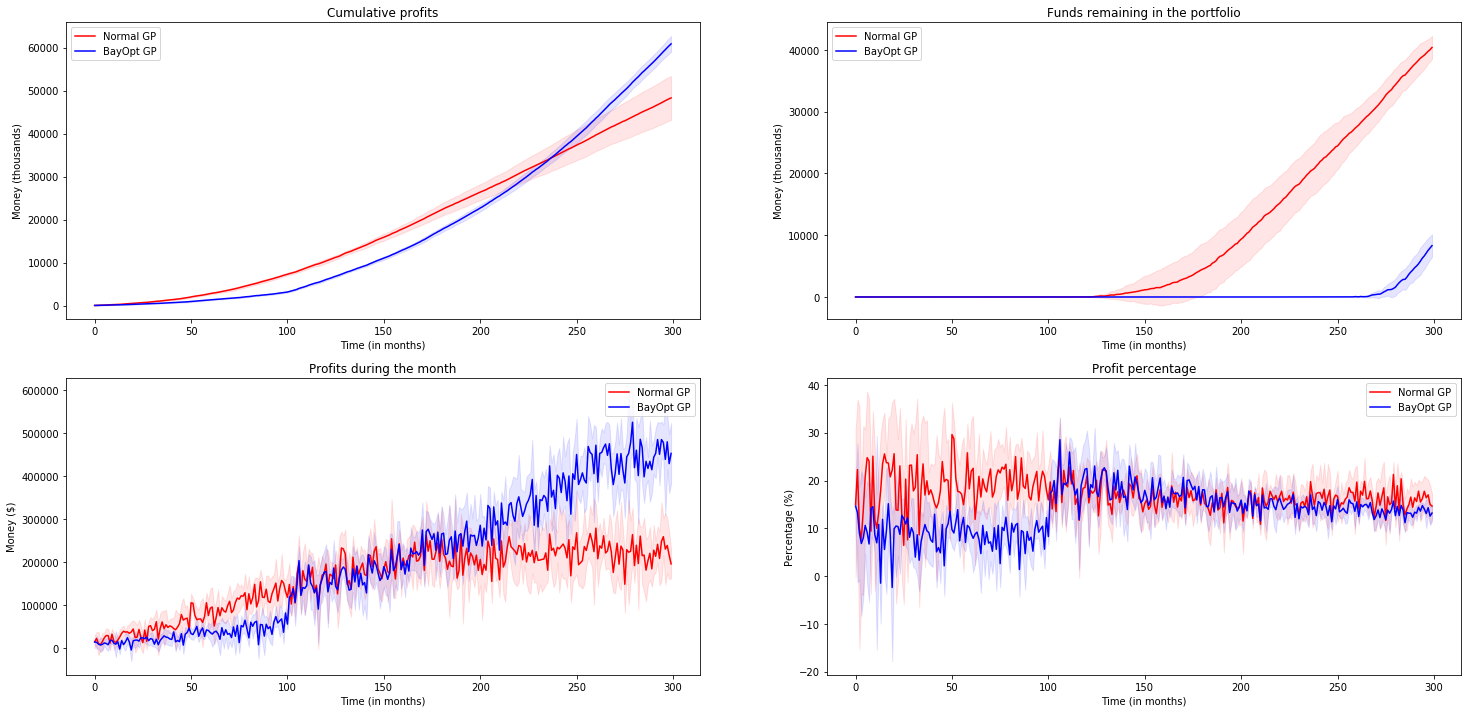

In [8]:
print("Mean Total Profits:")
print(np.mean(np.sum(perf_gp[:,:,0], axis=1)))
print(np.mean(np.sum(perf_bayes_opt[:,:,0], axis=1)))

import os

from visualisation import plot_portfolio_performance, plot_portfolio_performance_comparisons

# Saving performances to pickle file and Loading performances from it
filename = os.path.join("results", "perf_bayeopt_vs_gp_1")
meta_info = ["Normal GP", "BayOpt GP"]
performances = [perf_gp, perf_bayes_opt]
store_performance_results(performances, meta_info, filename)

meta_info, loaded_perf = load_performance_results(filename)
print(meta_info)
plot_portfolio_performance_comparisons(loaded_perf, legend_names=meta_info)

In [95]:
"""
EXPERIMENT 2: GP VS BAYES OPT IN EARLY STAGES
-------------------------------------------------------
Set up:
1. Let K = 100-500.
2. Create two GP models: gp_model_normal and gp_model_bayes_opt.
3. [OPTIONAL] Create an SVM model.
Experiment:
1. Train gp_model_normal using K randomly chosen data rows. Then let it do pure prediction.
2. Train gp_model_bayes_opt iteratively K steps. Each step explore the row with large acquisition function. Then pure prediction.
3. [OPTIONAL] Train svm_model with the same set in step 1 and let it predict to compare.
4. [OPTIONAL] Train svm_model with the same set in step 2 and let it predict to compare.
Results:
1. Compare the 3 profits gained at the end of all periods.
"""

from sklearn.model_selection import train_test_split
from scipy.stats import norm

%load_ext autoreload
%autoreload 2
%reload_ext autoreload

SEED            = 1
THRESHOLD       = 1.1
NUM_PERIODS     = 5
NUM_MONTHS      = 300
FUND_GIVEN      = 0
FUND_PER_MONTH  = 1e5
LOANS_PER_MONTH = 500
CONF_QUANTILE   = (45,100)
NUM_TRAIN_ROWS = 50
KAPPA = 5# norm.ppf(0.75)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [96]:
# Data initialization
X = features[:,:-2]
y = features[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=NUM_TRAIN_ROWS, random_state=2)

X_train_bo, X_test_bo, y_train_bo, y_test_bo = train_test_split(X, y, train_size=1, random_state=None)

# Normalize X
X_scaler = MinMaxScaler()
X_scaler.fit(X_train)
X_train = X_scaler.transform(X_train)
X_test = X_scaler.transform(X_test)
X_train_bo = X_scaler.transform(X_train_bo)
X_test_bo = X_scaler.transform(X_test_bo)
X = X_scaler.transform(X)

# Normalize y
y_scaler = MinMaxScaler()
y_scaler.fit(y_train.reshape(-1,1))
y_train_scaled = y_scaler.transform(y_train.reshape(-1,1))
y_train_bo_scaled = y_scaler.transform(y_train_bo.reshape(-1, 1))
y_test_bo_scaled = y_scaler.transform(y_test_bo.reshape(-1, 1))
y = y_scaler.transform(y.reshape(-1, 1))

print("X_train: %s, y_train: %s" % (str(X_train.shape), str(y_train.shape)))
print("X_test: %s, y_test: %s" % (str(X_test.shape), str(y_test.shape)))
print("X_train_bo: {}, y_train_bo: {}".format(X_train_bo.shape, y_train_bo.shape))
print("X_test_bo: {}, y_test_bo: {}".format(X_test_bo.shape, y_test_bo.shape))
print("y_train_scaled: {}".format(y_train_scaled.shape))
print("y_train_bo_scaled: {}".format(y_train_bo_scaled.shape))
print("y_test_bo_scaled: {}".format(y_test_bo_scaled.shape))
print("X: {}, y: {}".format(X.shape, y.shape))

X_train: (50, 38), y_train: (50,)
X_test: (42485, 38), y_test: (42485,)
X_train_bo: (1, 38), y_train_bo: (1,)
X_test_bo: (42534, 38), y_test_bo: (42534,)
y_train_scaled: (50, 1)
y_train_bo_scaled: (1, 1)
y_test_bo_scaled: (42534, 1)
X: (42535, 38), y: (42535, 1)


In [97]:
# Normal GP model init
import GPy
kernel = GPy.kern.RBF(input_dim=X_train.shape[1], variance=1., lengthscale=1.)
gp_model_normal = GPy.models.GPRegression(X_train, y_train_scaled, kernel)
gp_model_normal.optimize()

In [98]:
# Bayesian Optimization GP model init
import GPy
import numpy as np
kernel = GPy.kern.RBF(input_dim=X_train_bo.shape[1], variance=1., lengthscale=1.)

print(X_train_bo.shape)
print(y_train_bo_scaled.shape)

gp_model_bay_opt = GPy.models.GPRegression(X_train_bo, y_train_bo_scaled, kernel)
gp_model_bay_opt.optimize()

for i in range(NUM_TRAIN_ROWS):
    mean, var = gp_model_bay_opt.predict(X_test_bo)
    acquisition = mean + np.sqrt(var)*KAPPA
    next_sample_ind = acquisition.argmax()
    next_sample_X = X_test_bo[next_sample_ind].reshape(1,-1)
    next_sample_y = y_test_bo_scaled[next_sample_ind].reshape(1, -1)
    X_train_bo = np.concatenate((X_train_bo, next_sample_X), axis=0)
    y_train_bo_scaled = np.concatenate((y_train_bo_scaled, next_sample_y), axis=0)
    X_test_bo = np.delete(X_test_bo, next_sample_ind, axis=0)
    y_test_bo_scaled = np.delete(y_test_bo_scaled, next_sample_ind, axis=0)
    gp_model_bay_opt.set_XY(X=X_train_bo, Y=y_train_bo_scaled)
    gp_model_bay_opt.optimize()

(1, 38)
(1, 1)


In [99]:
# Properly init test dataset
# TODO TODO TODO TODO
print("gp_normal: {} {}".format(gp_model_normal.X.shape, gp_model_normal.Y.shape))
print("gp_bay_opt: {} {}".format(gp_model_bay_opt.X.shape, gp_model_bay_opt.Y.shape))

gp_normal: (50, 38) (50, 1)
gp_bay_opt: (51, 38) (51, 1)


In [100]:
from simulation import *

perf_gp = simulate_N_time_periods(
    gp_model_normal,
    X_test, y_test,
    X_scaler, y_scaler,
    threshold=THRESHOLD,
    num_periods=NUM_PERIODS,
    fund_given=FUND_GIVEN,
    num_months=120,
    incoming_fund_per_month=FUND_PER_MONTH,
    incoming_loans_per_time_period=LOANS_PER_MONTH,
    conf_quantile=CONF_QUANTILE,
    optimize_for="TODO", 
    version="loan_amount_and_variance",
    model_type="gp",
    seed=SEED
)
print("Profits for self-updating GP:")
print(np.mean(np.sum(perf_gp[:,:,0], axis=1)))

Simulating period 0...
month: 0
month: 1
month: 2
month: 3
month: 4
month: 5
month: 6
month: 7
month: 8
month: 9
month: 10
month: 11
month: 12
month: 13
month: 14
month: 15
month: 16
month: 17
month: 18
month: 19
month: 20
month: 21
month: 22
month: 23
month: 24
month: 25
month: 26
month: 27
month: 28
month: 29
month: 30
month: 31
month: 32
month: 33
month: 34
month: 35
month: 36
month: 37
month: 38
month: 39
month: 40
month: 41
month: 42
month: 43
month: 44
month: 45
month: 46
month: 47
month: 48
month: 49
month: 50
month: 51
month: 52
month: 53
month: 54
month: 55
month: 56
month: 57
month: 58
month: 59
month: 60
month: 61
month: 62
month: 63
month: 64
month: 65
month: 66
month: 67
month: 68
month: 69
month: 70
month: 71
month: 72
month: 73
month: 74
month: 75
month: 76
month: 77
month: 78
month: 79
month: 80
month: 81
month: 82
month: 83
month: 84
month: 85
month: 86
month: 87
month: 88
month: 89
month: 90
month: 91
month: 92
month: 93
month: 94
month: 95
month: 96
month: 97
month: 

In [101]:
from simulation import *

perf_bayes_opt = simulate_N_time_periods(
    gp_model_bay_opt,
    X_test, y_test,
    X_scaler, y_scaler,
    threshold=THRESHOLD,
    num_periods=NUM_PERIODS,
    fund_given=FUND_GIVEN, 
    num_months=120,
    incoming_fund_per_month=FUND_PER_MONTH,
    incoming_loans_per_time_period=LOANS_PER_MONTH,
    conf_quantile=CONF_QUANTILE,
    optimize_for="TODO",
    version="loan_amount_and_variance",
    model_type="gp", seed=SEED
)
print("Profits for Bayesian Optimization:")
print(np.mean(np.sum(perf_bayes_opt[:,:,0], axis=1)))

Simulating period 0...
month: 0
month: 1
month: 2
month: 3
month: 4
month: 5
month: 6
month: 7
month: 8
month: 9
month: 10
month: 11
month: 12
month: 13
month: 14
month: 15
month: 16
month: 17
month: 18
month: 19
month: 20
month: 21
month: 22
month: 23
month: 24
month: 25
month: 26
month: 27
month: 28
month: 29
month: 30
month: 31
month: 32
month: 33
month: 34
month: 35
month: 36
month: 37
month: 38
month: 39
month: 40
month: 41
month: 42
month: 43
month: 44
month: 45
month: 46
month: 47
month: 48
month: 49
month: 50
month: 51
month: 52
month: 53
month: 54
month: 55
month: 56
month: 57
month: 58
month: 59
month: 60
month: 61
month: 62
month: 63
month: 64
month: 65
month: 66
month: 67
month: 68
month: 69
month: 70
month: 71
month: 72
month: 73
month: 74
month: 75
month: 76
month: 77
month: 78
month: 79
month: 80
month: 81
month: 82
month: 83
month: 84
month: 85
month: 86
month: 87
month: 88
month: 89
month: 90
month: 91
month: 92
month: 93
month: 94
month: 95
month: 96
month: 97
month: 

Mean Total Profits:
5903212.21613
7407196.73815
['Normal GP', 'BayOpt GP']


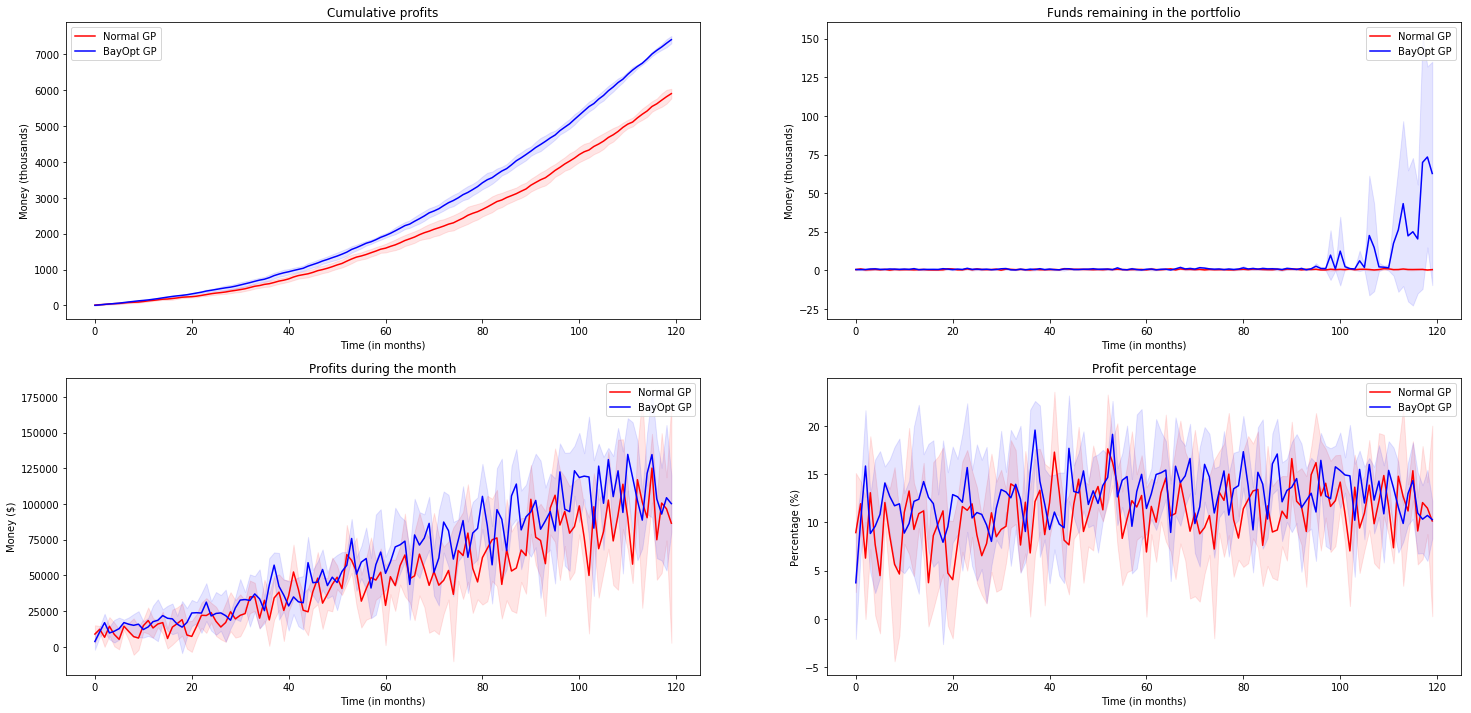

In [102]:
print("Mean Total Profits:")
print(np.mean(np.sum(perf_gp[:,:,0], axis=1)))
print(np.mean(np.sum(perf_bayes_opt[:,:,0], axis=1)))

import os

from visualisation import plot_portfolio_performance, plot_portfolio_performance_comparisons

# Saving performances to pickle file and Loading performances from it
filename = os.path.join("results", "perf_bayeopt_vs_gp_2")
meta_info = ["Normal GP", "BayOpt GP"]
performances = [perf_gp, perf_bayes_opt]
store_performance_results(performances, meta_info, filename)

meta_info, loaded_perf = load_performance_results(filename)
print(meta_info)
plot_portfolio_performance_comparisons(loaded_perf, legend_names=meta_info)